In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('netflix_titles.csv')

df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# Grafico a tornta con le percentuali di Film e serie TV

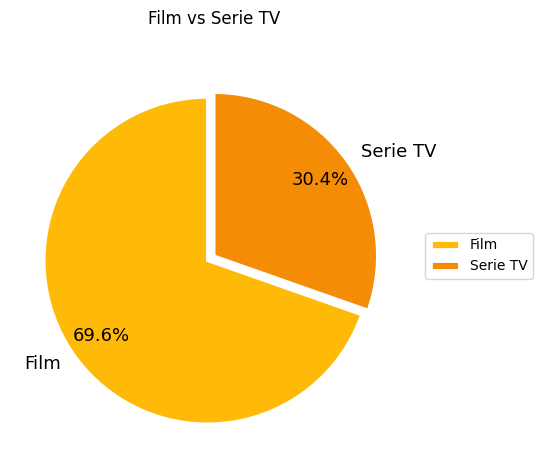

In [18]:
t_count = df['type'].value_counts()

fig, ax = plt.subplots()

colors = ['#ffba08', '#f48c06']                     
explode = (0.05, 0)                                
wedges, texts, autotexts = ax.pie(
    t_count,
    labels=['Film', 'Serie TV'],
    explode=explode,
    colors=colors,
    autopct='%1.1f%%',
    pctdistance=0.8,                                
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},
    textprops={'fontsize': 13}
)

ax.set_title('Film vs Serie TV', pad=20)
ax.legend(wedges, ['Film', 'Serie TV'], loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()

In [11]:
countries = (df['country'].dropna().str.split(',').explode().str.strip())

country_counts = countries.value_counts().head(15)
print(country_counts)


country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Name: count, dtype: int64


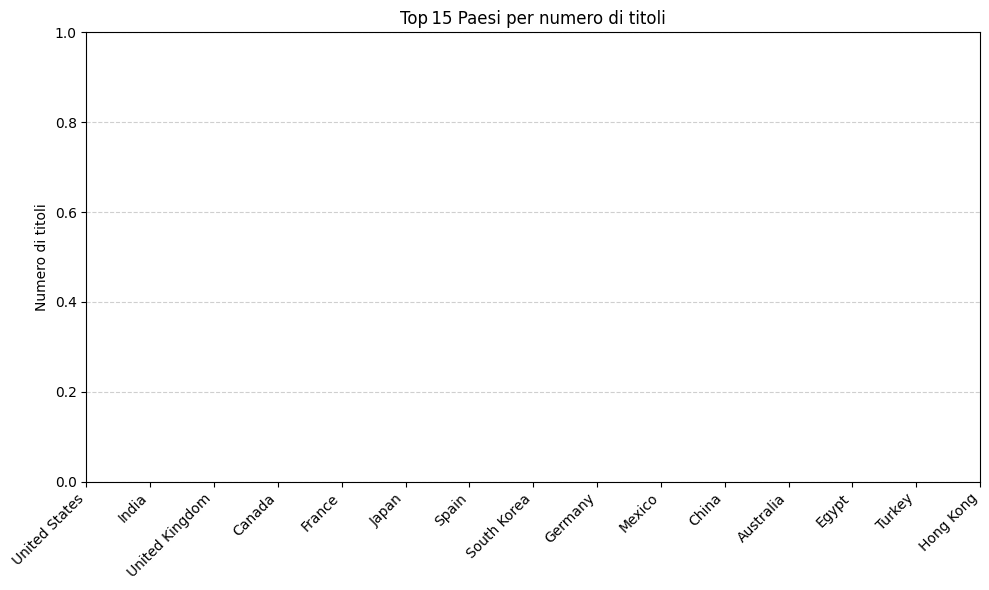

In [ ]:
plt.figure()
country_counts.plot(kind='bar')
plt.ylabel('Numero di titoli')
plt.title('Top 15 Paesi per numero di titoli nel catalogo Netflix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

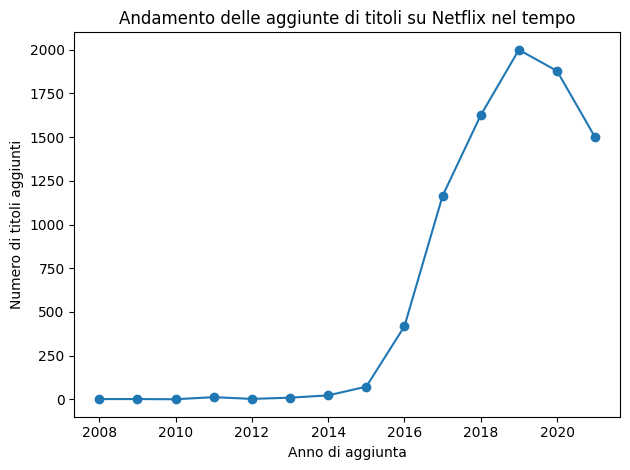

In [20]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
year_counts = df['year_added'].value_counts().sort_index()

plt.figure()
year_counts.plot(kind='line', marker='o')
plt.xlabel('Anno di aggiunta')
plt.ylabel('Numero di titoli aggiunti')
plt.title('Andamento delle aggiunte di titoli su Netflix nel tempo')
plt.tight_layout()
plt.show()